# Individual Recommender Systems for the X-Wines Dataset

# Loading the Required Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the Datasets: Wines and Ratings

In [20]:
dataset_folder = 'dataset'

wines_file = os.path.join(dataset_folder, 'XWines_Full_100K_wines.csv')
wines_df = pd.read_csv(wines_file, index_col='WineID') # index_col='WineID' makes WineID the index of the dataframe

ratings_file = os.path.join(dataset_folder, 'XWines_Full_21M_ratings.csv')
ratings_df = pd.read_csv(ratings_file, index_col='RatingID') # index_col='RatingID' makes RatingID the index of the dataframe

/var/folders/9n/hfw66rw97sl45x98mmd_vs4r0000gn/T/ipykernel_14827/3966071851.py:7: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  ratings_df = pd.read_csv(ratings_file, index_col='RatingID') # index_col='RatingID' makes RatingID the index of the dataframe


In [21]:
display(ratings_df.head())

,UserID,WineID,Vintage,Rating,Date
RatingID,,,,,
1,1604441,136103,1950,4.0,2019-10-14 11:20:52
2,1291483,136103,1950,5.0,2019-11-28 03:36:33
3,1070605,104036,1950,5.0,2017-12-28 10:15:55
4,1080181,144864,1950,5.0,2016-06-23 02:16:22
5,1834379,111430,1950,5.0,2021-05-16 17:58:14


In [22]:
# Checking how many unique Rating we have and sort it in ascending order
ratings_df['Rating'].unique() # We don't have simply regression values, but only these 9 Possible Ratings the user can give

array([4. , 5. , 1. , 3.5, 4.5, 3. , 2.5, 2. , 1.5])

In [23]:
# Dropping the Date column, as we don't need it for now
ratings_df.drop(columns=['Date'], inplace=True)
display(ratings_df.head())

,UserID,WineID,Vintage,Rating
RatingID,,,,
1,1604441,136103,1950,4.0
2,1291483,136103,1950,5.0
3,1070605,104036,1950,5.0
4,1080181,144864,1950,5.0
5,1834379,111430,1950,5.0


In [25]:
display(wines_df.head())

,WineName,Type,Elaborate,Grapes,Harmonize,ABV,Body,Acidity,Code,Country,RegionID,RegionName,WineryID,WineryName,Vintages
WineID,,,,,,,,,,,,,,,
100001,Espumante Moscatel,Sparkling,Varietal/100%,['Muscat/Moscato'],"['Pork', 'Rich Fish', 'Shellfish']",7.5,Medium-bodied,High,BR,Brazil,1001,Serra Gaúcha,10001,Casa Perini,"[2020, 2019, 2018, 2017, 2016, 2015, 2014, 201..."
100002,Ancellotta,Red,Varietal/100%,['Ancellotta'],"['Beef', 'Barbecue', 'Codfish', 'Pasta', 'Pizz...",12.0,Medium-bodied,Medium,BR,Brazil,1001,Serra Gaúcha,10001,Casa Perini,"[2016, 2015, 2014, 2013, 2012, 2011, 2010, 200..."
100003,Cabernet Sauvignon,Red,Varietal/100%,['Cabernet Sauvignon'],"['Beef', 'Lamb', 'Poultry']",12.0,Full-bodied,High,BR,Brazil,1001,Serra Gaúcha,10002,Castellamare,"[2021, 2020, 2019, 2018, 2017, 2016, 2015, 201..."
100004,Virtus Moscato,White,Varietal/100%,['Muscat/Moscato'],['Sweet Dessert'],12.0,Medium-bodied,Medium,BR,Brazil,1001,Serra Gaúcha,10003,Monte Paschoal,"[2021, 2020, 2019, 2018, 2017, 2016, 2015, 201..."
100005,Maison de Ville Cabernet-Merlot,Red,Assemblage/Bordeaux Red Blend,"['Cabernet Sauvignon', 'Merlot']","['Beef', 'Lamb', 'Game Meat', 'Poultry']",11.0,Full-bodied,Medium,BR,Brazil,1001,Serra Gaúcha,10000,Aurora,"[2021, 2020, 2019, 2018, 2017, 2016, 2015, 201..."


In [24]:
# Dropping the Website column, as we don't need it for now
wines_df.drop(columns=['Website'], inplace=True)

In [26]:
# Checking how many unique values there are for column Code
wines_df['Code'].nunique()

62

In [27]:
# Checking how many unique values there are for Country
wines_df['Country'].nunique()

62

* We can see that having Code and Country is redundant. I will keep the Country column since it is more descriptive

In [28]:
# Dropping the Code column as it is redudant when we also have the Country column
wines_df.drop(columns=['Code'], inplace=True)

In [29]:
# Checking how many Unique values there are for the RegionID column
wines_df['RegionID'].nunique()

2160

In [30]:
# Checking how many unique values there are for the RegionName column
wines_df['RegionName'].nunique()

2160

* Once again we see that we do not need both a RegionID and RegionName

In [31]:
# Dropping the RegionID column as it is redudant when we also have the RegionName column
wines_df.drop(columns=['RegionID'], inplace=True)

In [32]:
# Checking how many Unique values there are for the WineryID column
wines_df['WineryID'].nunique()

30510

In [33]:
# Checking how many unique values there are for the WineryName column
wines_df['WineryName'].nunique()

30190

* Here we see something interesting. There are wineries with the same name (which makes sense considering tha ammount of different wines present)

In [34]:
display(wines_df.head())

,WineName,Type,Elaborate,Grapes,Harmonize,ABV,Body,Acidity,Country,RegionName,WineryID,WineryName,Vintages
WineID,,,,,,,,,,,,,
100001,Espumante Moscatel,Sparkling,Varietal/100%,['Muscat/Moscato'],"['Pork', 'Rich Fish', 'Shellfish']",7.5,Medium-bodied,High,Brazil,Serra Gaúcha,10001,Casa Perini,"[2020, 2019, 2018, 2017, 2016, 2015, 2014, 201..."
100002,Ancellotta,Red,Varietal/100%,['Ancellotta'],"['Beef', 'Barbecue', 'Codfish', 'Pasta', 'Pizz...",12.0,Medium-bodied,Medium,Brazil,Serra Gaúcha,10001,Casa Perini,"[2016, 2015, 2014, 2013, 2012, 2011, 2010, 200..."
100003,Cabernet Sauvignon,Red,Varietal/100%,['Cabernet Sauvignon'],"['Beef', 'Lamb', 'Poultry']",12.0,Full-bodied,High,Brazil,Serra Gaúcha,10002,Castellamare,"[2021, 2020, 2019, 2018, 2017, 2016, 2015, 201..."
100004,Virtus Moscato,White,Varietal/100%,['Muscat/Moscato'],['Sweet Dessert'],12.0,Medium-bodied,Medium,Brazil,Serra Gaúcha,10003,Monte Paschoal,"[2021, 2020, 2019, 2018, 2017, 2016, 2015, 201..."
100005,Maison de Ville Cabernet-Merlot,Red,Assemblage/Bordeaux Red Blend,"['Cabernet Sauvignon', 'Merlot']","['Beef', 'Lamb', 'Game Meat', 'Poultry']",11.0,Full-bodied,Medium,Brazil,Serra Gaúcha,10000,Aurora,"[2021, 2020, 2019, 2018, 2017, 2016, 2015, 201..."


In [36]:
# Checking how many WineName unique there are (I suspect there will be some repeated)
wines_df['WineName'].nunique()

60981

In [37]:
# Checking how many unique values for WineID there are
wines_df.index.nunique()

100646

In [39]:
# Checking the different wine types (Type column)
wines_df['Type'].unique()

array(['Sparkling', 'Red', 'White', 'Dessert/Port', 'Dessert', 'Rosé'],
      dtype=object)

* Another interesting fact: Many more Unique Wines compared to names, since some Wines are named the same

In [40]:
# Checking the different Elaborate
wines_df['Elaborate'].unique()

array(['Varietal/100%', 'Assemblage/Bordeaux Red Blend',
       'Assemblage/Blend', 'Assemblage/Portuguese White Blend',
       'Assemblage/Port Blend', 'Assemblage/Portuguese Red Blend',
       'Assemblage/Champagne Blend', 'Assemblage/Valpolicella Red Blend',
       'Varietal/>75%', 'Assemblage/Provence Rosé Blend',
       'Assemblage/Rhône Red Blend', 'Assemblage/Priorat Red Blend',
       'Assemblage/Bourgogne Red Blend',
       'Assemblage/Bourgogne White Blend', 'Assemblage/Tuscan Red Blend',
       'Assemblage/Chianti Red Blend', 'Assemblage/Soave White Blend',
       'Assemblage/Rioja Red Blend', 'Assemblage/Cava Blend',
       'Assemblage/Rioja White Blend', 'Assemblage/Meritage Red Blend',
       'Assemblage/Meritage White Blend'], dtype=object)

In [43]:
# Checking the different ABV
wines_df['ABV'].nunique()

162

* As suspected, the Alcohol level is indeed a Float, a numeric Feature

In [44]:
# Checking the unique Body
wines_df['Body'].unique()

array(['Medium-bodied', 'Full-bodied', 'Very light-bodied',
       'Very full-bodied', 'Light-bodied'], dtype=object)

In [45]:
# Checking the Unique Acidity
wines_df['Acidity'].unique()

array(['High', 'Medium', 'Low'], dtype=object)

In [35]:
display(ratings_df.head())

,UserID,WineID,Vintage,Rating
RatingID,,,,
1,1604441,136103,1950,4.0
2,1291483,136103,1950,5.0
3,1070605,104036,1950,5.0
4,1080181,144864,1950,5.0
5,1834379,111430,1950,5.0


# Replicating Lab 1 for X-Wines

## Non-Personalized Recommender Systems

### Recomment the Top N Wines with the Highest Average Rating

In [50]:
# Checking the Data Type of the Rating column
ratings_df['Rating'].dtype

dtype('float64')

In [51]:
# Group by 'WineID' and compute the mean of the 'Rating' column
average_ratings_df = ratings_df.groupby('WineID')['Rating'].mean().reset_index()

# Sort the DataFrame by 'Rating' in descending order
sorted_avg_ratings_df = average_ratings_df.sort_values(by="Rating", ascending=False)

# Display the top 10 wines with the highest average rating
display(sorted_avg_ratings_df.head(10))


,WineID,Rating
91597,191711,5.000000
34883,134905,5.000000
55043,155122,5.000000
90036,190148,4.944444
88301,188413,4.944444
6257,106259,4.944444
17324,117346,4.942675
83335,183447,4.938889
90771,190883,4.928571
82145,182257,4.922581


In [54]:
joined_df = sorted_avg_ratings_df.join(wines_df, on='WineID')
display(joined_df[['WineID', 'WineName', 'Rating']].head(10))

,WineID,WineName,Rating
91597,191711,Frattey Shams Anderson Valley Pinot Noir,5.000000
34883,134905,Bâtard-Montrachet Grand Cru,5.000000
55043,155122,Brigante Crocco Merlot,5.000000
90036,190148,Pajarito del Amor,4.944444
88301,188413,Jusqu'a l'Os,4.944444
6257,106259,Vintage Porto,4.944444
17324,117346,Clos d'Ambonnay Blanc de Noirs Brut Champagne,4.942675
83335,183447,Wraith Cabernet Sauvignon,4.938889
90771,190883,Saint Nicholas,4.928571
82145,182257,Treehouse Pinot Noir,4.922581


* Of course, what we did above simply gets the Wines with the Highest average Rating, without taking into consideration how many people have rated it this way.


In [55]:
# Step 1: Compute the count and average rating per WineID
average_ratings_df = ratings_df.groupby(['WineID']).agg(
    count=('UserID', 'size'),
    rating=('Rating', 'mean')
).reset_index()

# Step 2: Sort the wines by average rating in descending order
sorted_avg_ratings_df = average_ratings_df.sort_values(by="rating", ascending=False)

# Step 3: Join with wines_df to get WineName and other details
joined_df = sorted_avg_ratings_df.merge(wines_df, on='WineID', how='left')

# Step 4: Display the top 10 wines with their names, count of ratings, and average rating
display(joined_df[['WineName', 'count', 'rating']].head(10))


,WineName,count,rating
0,Frattey Shams Anderson Valley Pinot Noir,5,5.000000
1,Bâtard-Montrachet Grand Cru,6,5.000000
2,Brigante Crocco Merlot,5,5.000000
3,Pajarito del Amor,9,4.944444
4,Jusqu'a l'Os,18,4.944444
5,Vintage Porto,9,4.944444
6,Clos d'Ambonnay Blanc de Noirs Brut Champagne,157,4.942675
7,Wraith Cabernet Sauvignon,90,4.938889
8,Saint Nicholas,7,4.928571
9,Treehouse Pinot Noir,155,4.922581


In [56]:
# Checking how many ratings a certain wine named "Frattey Shams Anderson Valley Pinot Noir" has received
wine_name = "Frattey Shams Anderson Valley Pinot Noir"
wine_id = wines_df[wines_df['WineName'] == wine_name].index[0]
ratings_count = average_ratings_df[average_ratings_df['WineID'] == wine_id]['count'].values[0]
ratings_avg = average_ratings_df[average_ratings_df['WineID'] == wine_id]['rating'].values[0]
print(f"The wine {wine_name} has received {ratings_count} ratings with an average rating of {ratings_avg:.2f}")


The wine Frattey Shams Anderson Valley Pinot Noir has received 5 ratings with an average rating of 5.00


### Average Rating with Minimum Number of Ratings

In [60]:
# Set the minimum number of ratings
minimum_ratings = 100

# Step 1: Compute average rating and count in one groupby
average_ratings_df = ratings_df.groupby('WineID').agg(
    AverageRating=('Rating', 'mean'),
    NumRatings=('Rating', 'count')
).reset_index()

# Step 2: Filter wines with more than the minimum number of ratings
average_ratings_df = average_ratings_df[average_ratings_df['NumRatings'] > minimum_ratings]

# Step 3: Sort by AverageRating in descending order
sorted_avg_ratings_df = average_ratings_df.sort_values(by='AverageRating', ascending=False)

# Step 4: Merge with wines_df to get WineName
# Since 'WineID' is the index in wines_df, we set right_index=True
joined_df = pd.merge(
    sorted_avg_ratings_df,
    wines_df[['WineName']],
    left_on='WineID',
    right_index=True,
    how='left'
)

# Step 5: Display the top 10 wines with their names, average ratings, and number of ratings
display(joined_df[['WineName', 'AverageRating', 'NumRatings']].head(10))


,WineName,AverageRating,NumRatings
17324,Clos d'Ambonnay Blanc de Noirs Brut Champagne,4.942675,157
82145,Treehouse Pinot Noir,4.922581,155
17638,Millésime Extra Brut Champagne Grand Cru,4.900685,146
75217,The Laird,4.888430,121
82421,Proprietary Red,4.874074,135
13194,Clos du Mesnil Blanc de Blancs Brut Champagne,4.846939,441
58651,Tinto,4.842342,111
18421,La Romanee Grand Cru Monopole,4.835938,128
39226,Case Basse Sangiovese Toscana,4.833333,291
19260,Musigny Grand Cru,4.827273,110


### Filtering the Top N Average Ratings considering: minimum number of ratings, country, type, accidity, and max ABV

In [61]:
wines_df['ABV'].describe()

count    100646.000000
mean         13.268421
std           1.472526
min           0.000000
25%          12.500000
50%          13.400000
75%          14.000000
max          50.000000
Name: ABV, dtype: float64

In [71]:
# Step 1: User-specified filters
selected_countries = ['Italy']         # e.g., ['France'], ['Italy', 'Spain'], None
selected_types = ['Red']                 # e.g., ['Red'], ['White', 'Rosé'], None
selected_acidity_levels = ['Low']      # e.g., ['High'], ['Low', 'Medium'], None
max_abv = 14.0                          # e.g., 14.0, None
max_abv = wines_df['ABV'].max()         # Uncomment to use the maximum ABV in the dataset
minimum_ratings = 100                            # Adjust as needed

# Step 2: Filter wines_df based on user-specified criteria
filtered_wines_df = wines_df.copy()

if selected_countries is not None:
    # Standardize 'Country' to title case
    filtered_wines_df['Country'] = filtered_wines_df['Country'].str.title()
    selected_countries = [country.title() for country in selected_countries]
    filtered_wines_df = filtered_wines_df[filtered_wines_df['Country'].isin(selected_countries)]

if selected_types is not None:
    # Standardize 'Type' to title case
    filtered_wines_df['Type'] = filtered_wines_df['Type'].str.title()
    selected_types = [wine_type.title() for wine_type in selected_types]
    filtered_wines_df = filtered_wines_df[filtered_wines_df['Type'].isin(selected_types)]

if max_abv is not None:
    filtered_wines_df = filtered_wines_df[filtered_wines_df['ABV'] <= max_abv]

if selected_acidity_levels is not None:
    # Standardize 'Acidity' to title case
    filtered_wines_df['Acidity'] = filtered_wines_df['Acidity'].str.title()
    selected_acidity_levels = [level.title() for level in selected_acidity_levels]
    filtered_wines_df = filtered_wines_df[filtered_wines_df['Acidity'].isin(selected_acidity_levels)]

# Step 3: Get the list of WineIDs after filtering
filtered_wine_ids = filtered_wines_df.index.tolist()

# Step 4: Filter ratings_df to include only ratings for the filtered wines
filtered_ratings_df = ratings_df[ratings_df['WineID'].isin(filtered_wine_ids)]

# Step 5: Compute average rating and count for filtered wines
average_ratings_df = filtered_ratings_df.groupby('WineID').agg(
    AverageRating=('Rating', 'mean'),
    NumRatings=('Rating', 'count')
).reset_index()

# Step 6: Filter wines with more than the minimum number of ratings
average_ratings_df = average_ratings_df[average_ratings_df['NumRatings'] >= minimum_ratings]

# Step 7: Sort by AverageRating in descending order
sorted_avg_ratings_df = average_ratings_df.sort_values(by='AverageRating', ascending=False)

# Step 8: Merge with filtered_wines_df to get WineName and other details
joined_df = pd.merge(
    sorted_avg_ratings_df,
    filtered_wines_df,
    left_on='WineID',
    right_index=True,
    how='left'
)

# Step 9: Display the top 10 wines with their details
display_columns = ['WineName', 'Country', 'Type', 'ABV', 'Acidity', 'AverageRating', 'NumRatings']
display(joined_df[display_columns].head(10))


,WineName,Country,Type,ABV,Acidity,AverageRating,NumRatings
23,Barrosu Cannonau di Sardegna Riserva Franzisca,Italy,Red,16.00,Low,4.35,104
16,Mamuthone Cannonau di Sardegna,Italy,Red,15.00,Low,4.10,217
11,Nepente di Oliena Cannonau di Sardegna,Italy,Red,14.50,Low,4.02,307
1,Rosso d'Italia,Italy,Red,15.50,Low,4.01,2187
6,Appassimento Rosso,Italy,Red,14.50,Low,3.92,383
18,'Inu Cannonau di Sardegna Riserva,Italy,Red,14.00,Low,3.90,203
7,Noras Cannonau di Sardegna,Italy,Red,15.20,Low,3.89,374
21,Salana Cannonau di Sardegna,Italy,Red,13.50,Low,3.88,146
10,Vecchie Viti Cannonau di Sardegna,Italy,Red,14.00,Low,3.86,315
2,Riserva Cannonau di Sardegna,Italy,Red,13.50,Low,3.82,1281


# Personalized Recommender Systems

## Content Based Recommender System

In [130]:
# Step 1: Import pandas and set display option
pd.set_option('display.float_format', '{:.2f}'.format)

# Assuming ratings_df is already loaded and contains the 'UserID' column

# Step 2: Compute the number of ratings per user
ratings_per_user = ratings_df.groupby('UserID').size()

# Step 3: Use describe() to get summary statistics
ratings_per_user_describe = ratings_per_user.describe()

# Step 4: Display the summary statistics
print("Summary Statistics of Ratings per User:")
print(ratings_per_user_describe)


Summary Statistics of Ratings per User:
count   1056079.00
mean         19.90
std          40.35
min           5.00
25%           8.00
50%          11.00
75%          20.00
max        2986.00
dtype: float64


In [131]:
# Selecting a Random user that has rated a number of movies equal to the mean
import random

# Assuming ratings_df is already loaded and contains the 'UserID' column

# Step 1: Compute the number of ratings per user
ratings_per_user = ratings_df.groupby('UserID').size()

# Step 2: Calculate the median number of ratings per user
mean_ratings = ratings_per_user.mean()
mean_ratings = 221
print(f"The mean number of ratings per user is: {mean_ratings}")

# Step 3: Round the median to the nearest integer
mean_ratings_int = int(round(mean_ratings))
print(f"The mean number of ratings per user (rounded) is: {mean_ratings_int}")

# Step 4: Filter users with number of ratings equal to the median
users_with_median_ratings = ratings_per_user[ratings_per_user == mean_ratings_int]

# Step 5: Get the list of UserIDs with median number of ratings
user_ids_with_median_ratings = users_with_median_ratings.index.tolist()
num_users = len(user_ids_with_median_ratings)
print(f"Number of users with {mean_ratings_int} ratings: {num_users}")

# Step 6: Select a random UserID from the list
if user_ids_with_median_ratings:
    random_user_id = random.choice(user_ids_with_median_ratings)
    print(f"Random UserID with {mean_ratings_int} ratings (median number of ratings): {random_user_id}")
else:
    print(f"No users found with exactly {mean_ratings_int} ratings.")

# Optional Step: Examine the selected user's ratings
if 'random_user_id' in locals():
    user_ratings = ratings_df[ratings_df['UserID'] == random_user_id]
    print(f"\nRatings by User {random_user_id}:")
    print(user_ratings)

# 2027976


The mean number of ratings per user is: 221
The mean number of ratings per user (rounded) is: 221
Number of users with 221 ratings: 50
Random UserID with 221 ratings (median number of ratings): 1288809

Ratings by User 1288809:
           UserID  WineID Vintage  Rating
RatingID                                 
433817    1288809  156881    2001    4.50
1327001   1288809  188202    2007    3.00
1632811   1288809  171312    2008    4.00
2403640   1288809  158797    2009    4.00
2526644   1288809  111974    2010    3.50
...           ...     ...     ...     ...
20815997  1288809  112020    N.V.    3.50
20855418  1288809  111551    N.V.    4.00
20911537  1288809  116893    N.V.    4.00
20966420  1288809  179690    N.V.    4.00
21012939  1288809  113916    N.V.    4.00

[221 rows x 4 columns]


In [132]:
# Step 1: Ensure 'WineID' is set as the index in wines_df for efficient lookup
if wines_df.index.name != 'WineID':
    wines_df.set_index('WineID', inplace=True)

# Step 2: Select Rated Wines based on 'WineID' from selected_user_ratings
rated_wines_df = wines_df.loc[list(user_ratings['WineID'])]

# Step 3: Select only the relevant features (similar to 'title' and 'plot' in movies)
selected_features = ['WineName', 'Type', 'Country', 'ABV', 'Body', 'Acidity']
rated_wines_df = rated_wines_df[selected_features]

# Step 4: Print and display the number of rated wines
print("Rated wines: " + str(rated_wines_df.shape[0]))

# Display the first 10 rated wines
display(rated_wines_df.head(10))


Rated wines: 221


,WineName,Type,Country,ABV,Body,Acidity
WineID,,,,,,
156881,Clos d'Englora AV 14,Red,Spain,14.00,Full-bodied,High
188202,Syrah,Red,United States,14.30,Full-bodied,High
171312,Merlot-Shiraz,Red,South Africa,14.50,Medium-bodied,Medium
158797,Reserva Rioja,Red,Spain,13.00,Full-bodied,High
111974,Pessac-Léognan,Red,France,13.50,Full-bodied,High
180859,Maximus,Red,United States,14.50,Full-bodied,High
162713,Unfiltered Red,Red,Chile,14.50,Medium-bodied,High
155469,Reserva-5 Years Tempranillo,Red,Spain,13.00,Full-bodied,Medium
101723,Winemaker's Selection Rosé,Rosé,Portugal,12.00,Full-bodied,High


In [133]:
# Step 5: Identify Unrated Wines and Select Relevant Features

# Compute the difference between all WineIDs and rated WineIDs
diff = set(wines_df.index) - set(rated_wines_df.index)

# Convert the difference set to a sorted list (optional for consistent ordering)
unrated_wine_ids = sorted(list(diff))

# Select unrated wines based on the difference
unrated_wines_df = wines_df.loc[unrated_wine_ids]

# Select the same relevant features as for rated wines
unrated_wines_df = unrated_wines_df[selected_features]

# Reset index to bring 'WineID' back as a column (optional for clarity)
unrated_wines_df.reset_index(inplace=True)

# Print and display the number of unrated wines
print("Unrated wines: " + str(unrated_wines_df.shape[0]))

# Display the first 10 unrated wines
display(unrated_wines_df.head(10))

Unrated wines: 100428


,WineID,WineName,Type,Country,ABV,Body,Acidity
0,100001,Espumante Moscatel,Sparkling,Brazil,7.50,Medium-bodied,High
1,100002,Ancellotta,Red,Brazil,12.00,Medium-bodied,Medium
2,100003,Cabernet Sauvignon,Red,Brazil,12.00,Full-bodied,High
3,100004,Virtus Moscato,White,Brazil,12.00,Medium-bodied,Medium
4,100005,Maison de Ville Cabernet-Merlot,Red,Brazil,11.00,Full-bodied,Medium
5,100006,Reserva Cabernet Sauvignon,Red,Brazil,12.50,Full-bodied,High
6,100007,Do Lugar Moscatel Espumantes,Sparkling,Brazil,7.50,Medium-bodied,High
7,100008,Paradoxo Cabernet Sauvignon,Red,Brazil,13.50,Full-bodied,High
8,100009,Seleção Cabernet Sauvignon-Merlot,Red,Brazil,12.50,Full-bodied,High
9,100010,Defesa Tinto,Red,Portugal,14.00,Full-bodied,High


In [134]:
# Step 6: Join Ratings Back to Rated Wines

# Reset index to ensure 'WineID' is a column for joining
rated_wines_df = rated_wines_df.reset_index()

# Join the user's ratings to the rated_wines_df DataFrame
rated_wines_df = rated_wines_df.join(
    user_ratings.set_index('WineID')['Rating'],
    on='WineID'
)

# Print and display the updated rated wines with ratings
print("Rated wines with ratings: " + str(rated_wines_df.shape[0]))
display(rated_wines_df.head(10))


Rated wines with ratings: 227


,WineID,WineName,Type,Country,ABV,Body,Acidity,Rating
0,156881,Clos d'Englora AV 14,Red,Spain,14.00,Full-bodied,High,4.50
1,188202,Syrah,Red,United States,14.30,Full-bodied,High,3.00
2,171312,Merlot-Shiraz,Red,South Africa,14.50,Medium-bodied,Medium,4.00
3,158797,Reserva Rioja,Red,Spain,13.00,Full-bodied,High,4.00
4,111974,Pessac-Léognan,Red,France,13.50,Full-bodied,High,3.50
5,180859,Maximus,Red,United States,14.50,Full-bodied,High,3.50
6,162713,Unfiltered Red,Red,Chile,14.50,Medium-bodied,High,3.50
7,155469,Reserva-5 Years Tempranillo,Red,Spain,13.00,Full-bodied,Medium,3.00
8,101723,Winemaker's Selection Rosé,Rosé,Portugal,12.00,Full-bodied,High,3.50
9,112027,Duluc de Branaire-Ducru Saint-Julien (Chateau ...,Red,France,13.00,Full-bodied,High,4.00


In [136]:
# Checking the Top 10 Best Rated Wines by the User
display(rated_wines_df.sort_values(by='Rating', ascending=False).head(20))

,WineID,WineName,Type,Country,ABV,Body,Acidity,Rating
0,156881,Clos d'Englora AV 14,Red,Spain,14.00,Full-bodied,High,4.50
141,179240,Zinfandel,Red,United States,13.50,Very full-bodied,High,4.50
61,181083,Fraternity Red Blend,Red,United States,14.50,Full-bodied,High,4.50
74,179984,Katherine Goldschmidt Crazy Creek Cabernet Sau...,Red,United States,14.50,Full-bodied,High,4.50
87,179011,Pinot Noir,Red,United States,13.70,Medium-bodied,High,4.50
87,179011,Pinot Noir,Red,United States,13.70,Medium-bodied,High,4.50
101,179041,Cabernet Sauvignon,Red,United States,14.20,Full-bodied,High,4.50
109,179011,Pinot Noir,Red,United States,13.70,Medium-bodied,High,4.50
122,179189,Earthquake Zinfandel,Red,United States,16.00,Very full-bodied,High,4.50
124,179089,Palermo Cabernet Sauvignon,Red,United States,15.60,Very full-bodied,Medium,4.50


In [137]:
# Define categorical and numerical features
categorical_features = ['Type', 'Country', 'Body', 'Acidity']
numerical_features = ['ABV']

In [138]:
# Import necessary library
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder with handle_unknown='ignore' to manage unforeseen categories
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit the encoder on the categorical features of all wines (both rated and unrated)
# This ensures that the encoder knows all possible categories
encoder.fit(wines_df[categorical_features])

# Transform categorical features for rated wines
rated_wines_categorical = encoder.transform(rated_wines_df[categorical_features])

# Transform categorical features for unrated wines
unrated_wines_categorical = encoder.transform(unrated_wines_df[categorical_features])

# Get feature names for the encoded columns
encoded_feature_names = encoder.get_feature_names_out(categorical_features)

# Convert the arrays back to DataFrames for easier manipulation
rated_wines_encoded_cat = pd.DataFrame(
    rated_wines_categorical,
    columns=encoded_feature_names,
    index=rated_wines_df.index
)

unrated_wines_encoded_cat = pd.DataFrame(
    unrated_wines_categorical,
    columns=encoded_feature_names,
    index=unrated_wines_df.index
)


In [139]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Fit the scaler on the 'ABV' feature from all wines
scaler.fit(wines_df[['ABV']])

# Transform the 'ABV' feature for rated wines
rated_wines_scaled = scaler.transform(rated_wines_df[['ABV']])

# Transform the 'ABV' feature for unrated wines
unrated_wines_scaled = scaler.transform(unrated_wines_df[['ABV']])

# Add the scaled 'ABV' back to the DataFrames
rated_wines_encoded_cat['ABV_scaled'] = rated_wines_scaled
unrated_wines_encoded_cat['ABV_scaled'] = unrated_wines_scaled


In [140]:
# Display the DataFrame with encoded features for rated wines
print("Encoded Features of Rated Wines:")
display(rated_wines_encoded_cat.head())

# Display the DataFrame with encoded features for unrated wines
print("Encoded Features of Unrated Wines:")
display(unrated_wines_encoded_cat.head())


Encoded Features of Rated Wines:


,Type_Dessert,Type_Dessert/Port,Type_Red,Type_Rosé,Type_Sparkling,Type_White,Country_Albania,Country_Argentina,Country_Armenia,Country_Australia,...,Country_Uruguay,Body_Full-bodied,Body_Light-bodied,Body_Medium-bodied,Body_Very full-bodied,Body_Very light-bodied,Acidity_High,Acidity_Low,Acidity_Medium,ABV_scaled
0,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.28
1,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.29
2,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.29
3,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.26
4,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.27


Encoded Features of Unrated Wines:


,Type_Dessert,Type_Dessert/Port,Type_Red,Type_Rosé,Type_Sparkling,Type_White,Country_Albania,Country_Argentina,Country_Armenia,Country_Australia,...,Country_Uruguay,Body_Full-bodied,Body_Light-bodied,Body_Medium-bodied,Body_Very full-bodied,Body_Very light-bodied,Acidity_High,Acidity_Low,Acidity_Medium,ABV_scaled
0,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.15
1,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.24
2,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.24
3,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.24
4,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.22


In [141]:
# Prepare the features (X) and target variable (y) for the rated wines
X = rated_wines_encoded_cat  # Encoded features of rated wines
y = rated_wines_df['Rating']  # Corresponding user ratings


In [142]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize the KNeighborsRegressor with 5 neighbors
knn_regressor = KNeighborsRegressor(n_neighbors=3)

# Train the model on the rated wines
knn_regressor.fit(X, y)


KNeighborsRegressor(n_neighbors=3)

In [143]:
# Prepare the features of the unrated wines
X_unrated = unrated_wines_encoded_cat  # Encoded features of unrated wines

# Predict the ratings
predicted_ratings = knn_regressor.predict(X_unrated)


In [144]:
# Add the predicted ratings to the unrated_wines_df DataFrame
unrated_wines_df['PredictedRating'] = predicted_ratings


In [145]:
# Sort the unrated wines by predicted rating in descending order
recommended_wines = unrated_wines_df.sort_values(by='PredictedRating', ascending=False)

# Define the columns to display
display_columns = ['WineName', 'Type', 'Country', 'ABV', 'Body', 'Acidity', 'PredictedRating']

# Display the top 10 recommended wines
print("\nTop 10 Recommended Wines:")
display(recommended_wines[display_columns].head(20))



Top 10 Recommended Wines:


,WineName,Type,Country,ABV,Body,Acidity,PredictedRating
9587,Grosses Gewächs Domina Trocken,Red,Germany,13.60,Very light-bodied,Medium,4.33
80804,Russian River Selection Chardonnay,White,United States,14.20,Full-bodied,High,4.33
91284,Cabernet Sauvignon,Red,United States,13.50,Very full-bodied,Medium,4.33
85643,Cabernet Sauvignon Caves Lot M Center Sylvain ...,Red,United States,13.50,Very full-bodied,Medium,4.33
70741,Merlot Reserve,Red,Argentina,14.10,Full-bodied,High,4.33
93800,Merengő Egri Bikavér Grand Superior,Red,Hungary,14.10,Full-bodied,High,4.33
79270,Rutherford Cabernet Sauvignon,Red,United States,13.50,Very full-bodied,Medium,4.33
89591,Stanley's Selection Cabernet Sauvignon,Red,United States,13.00,Very full-bodied,Medium,4.33
29542,Régulus Côtes-du-Rhône Rosé,Rosé,France,12.50,Medium-bodied,High,4.33
86891,Proprietor's Reserve Pinot Noir,Red,United States,12.90,Light-bodied,Medium,4.33


In [146]:
# ---------------------------------------
# Assuming previous steps have been completed:
# - Features have been encoded and scaled
# - X, y, X_unrated are defined
# ---------------------------------------

# Step 1: Import the DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

# Step 2: Initialize and Train the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42, max_depth=4)
dt_regressor.fit(X, y)

# Step 3: Predict Ratings for Unrated Wines
predicted_ratings_dt = dt_regressor.predict(X_unrated)

# Step 4: Add Predicted Ratings to Unrated Wines DataFrame
unrated_wines_df['PredictedRating_DT'] = predicted_ratings_dt

# Step 5: Recommend Wines with Higher Predicted Ratings
recommended_wines_dt = unrated_wines_df.sort_values(by='PredictedRating_DT', ascending=False)

# Define the columns to display
display_columns = ['WineName', 'Type', 'Country', 'ABV', 'Body', 'Acidity', 'PredictedRating_DT']

# Display the top 10 recommended wines
print("\nTop 10 Recommended Wines (Decision Tree Regressor):")
display(recommended_wines_dt[display_columns].head(20))



Top 10 Recommended Wines (Decision Tree Regressor):


,WineName,Type,Country,ABV,Body,Acidity,PredictedRating_DT
79800,Petite Sirah,Red,United States,13.50,Very full-bodied,High,4.25
85093,Cabernet Sauvignon,Red,United States,13.00,Very full-bodied,Medium,4.25
87590,Cabernet Sauvignon,Red,United States,13.50,Very full-bodied,Medium,4.25
84588,Zinfandel,Red,United States,13.40,Very full-bodied,High,4.25
91228,Merlot,Red,United States,13.00,Very full-bodied,High,4.25
82861,Shooting Star Zinfandel,Red,United States,13.50,Very full-bodied,High,4.25
80345,Merlot,Red,United States,12.60,Very full-bodied,High,4.25
88217,Cabernet Sauvignon,Red,United States,13.60,Very full-bodied,Medium,4.25
84585,A Villainous Zinfandel,Red,United States,13.50,Very full-bodied,High,4.25
78918,Merlot,Red,United States,13.50,Very full-bodied,High,4.25


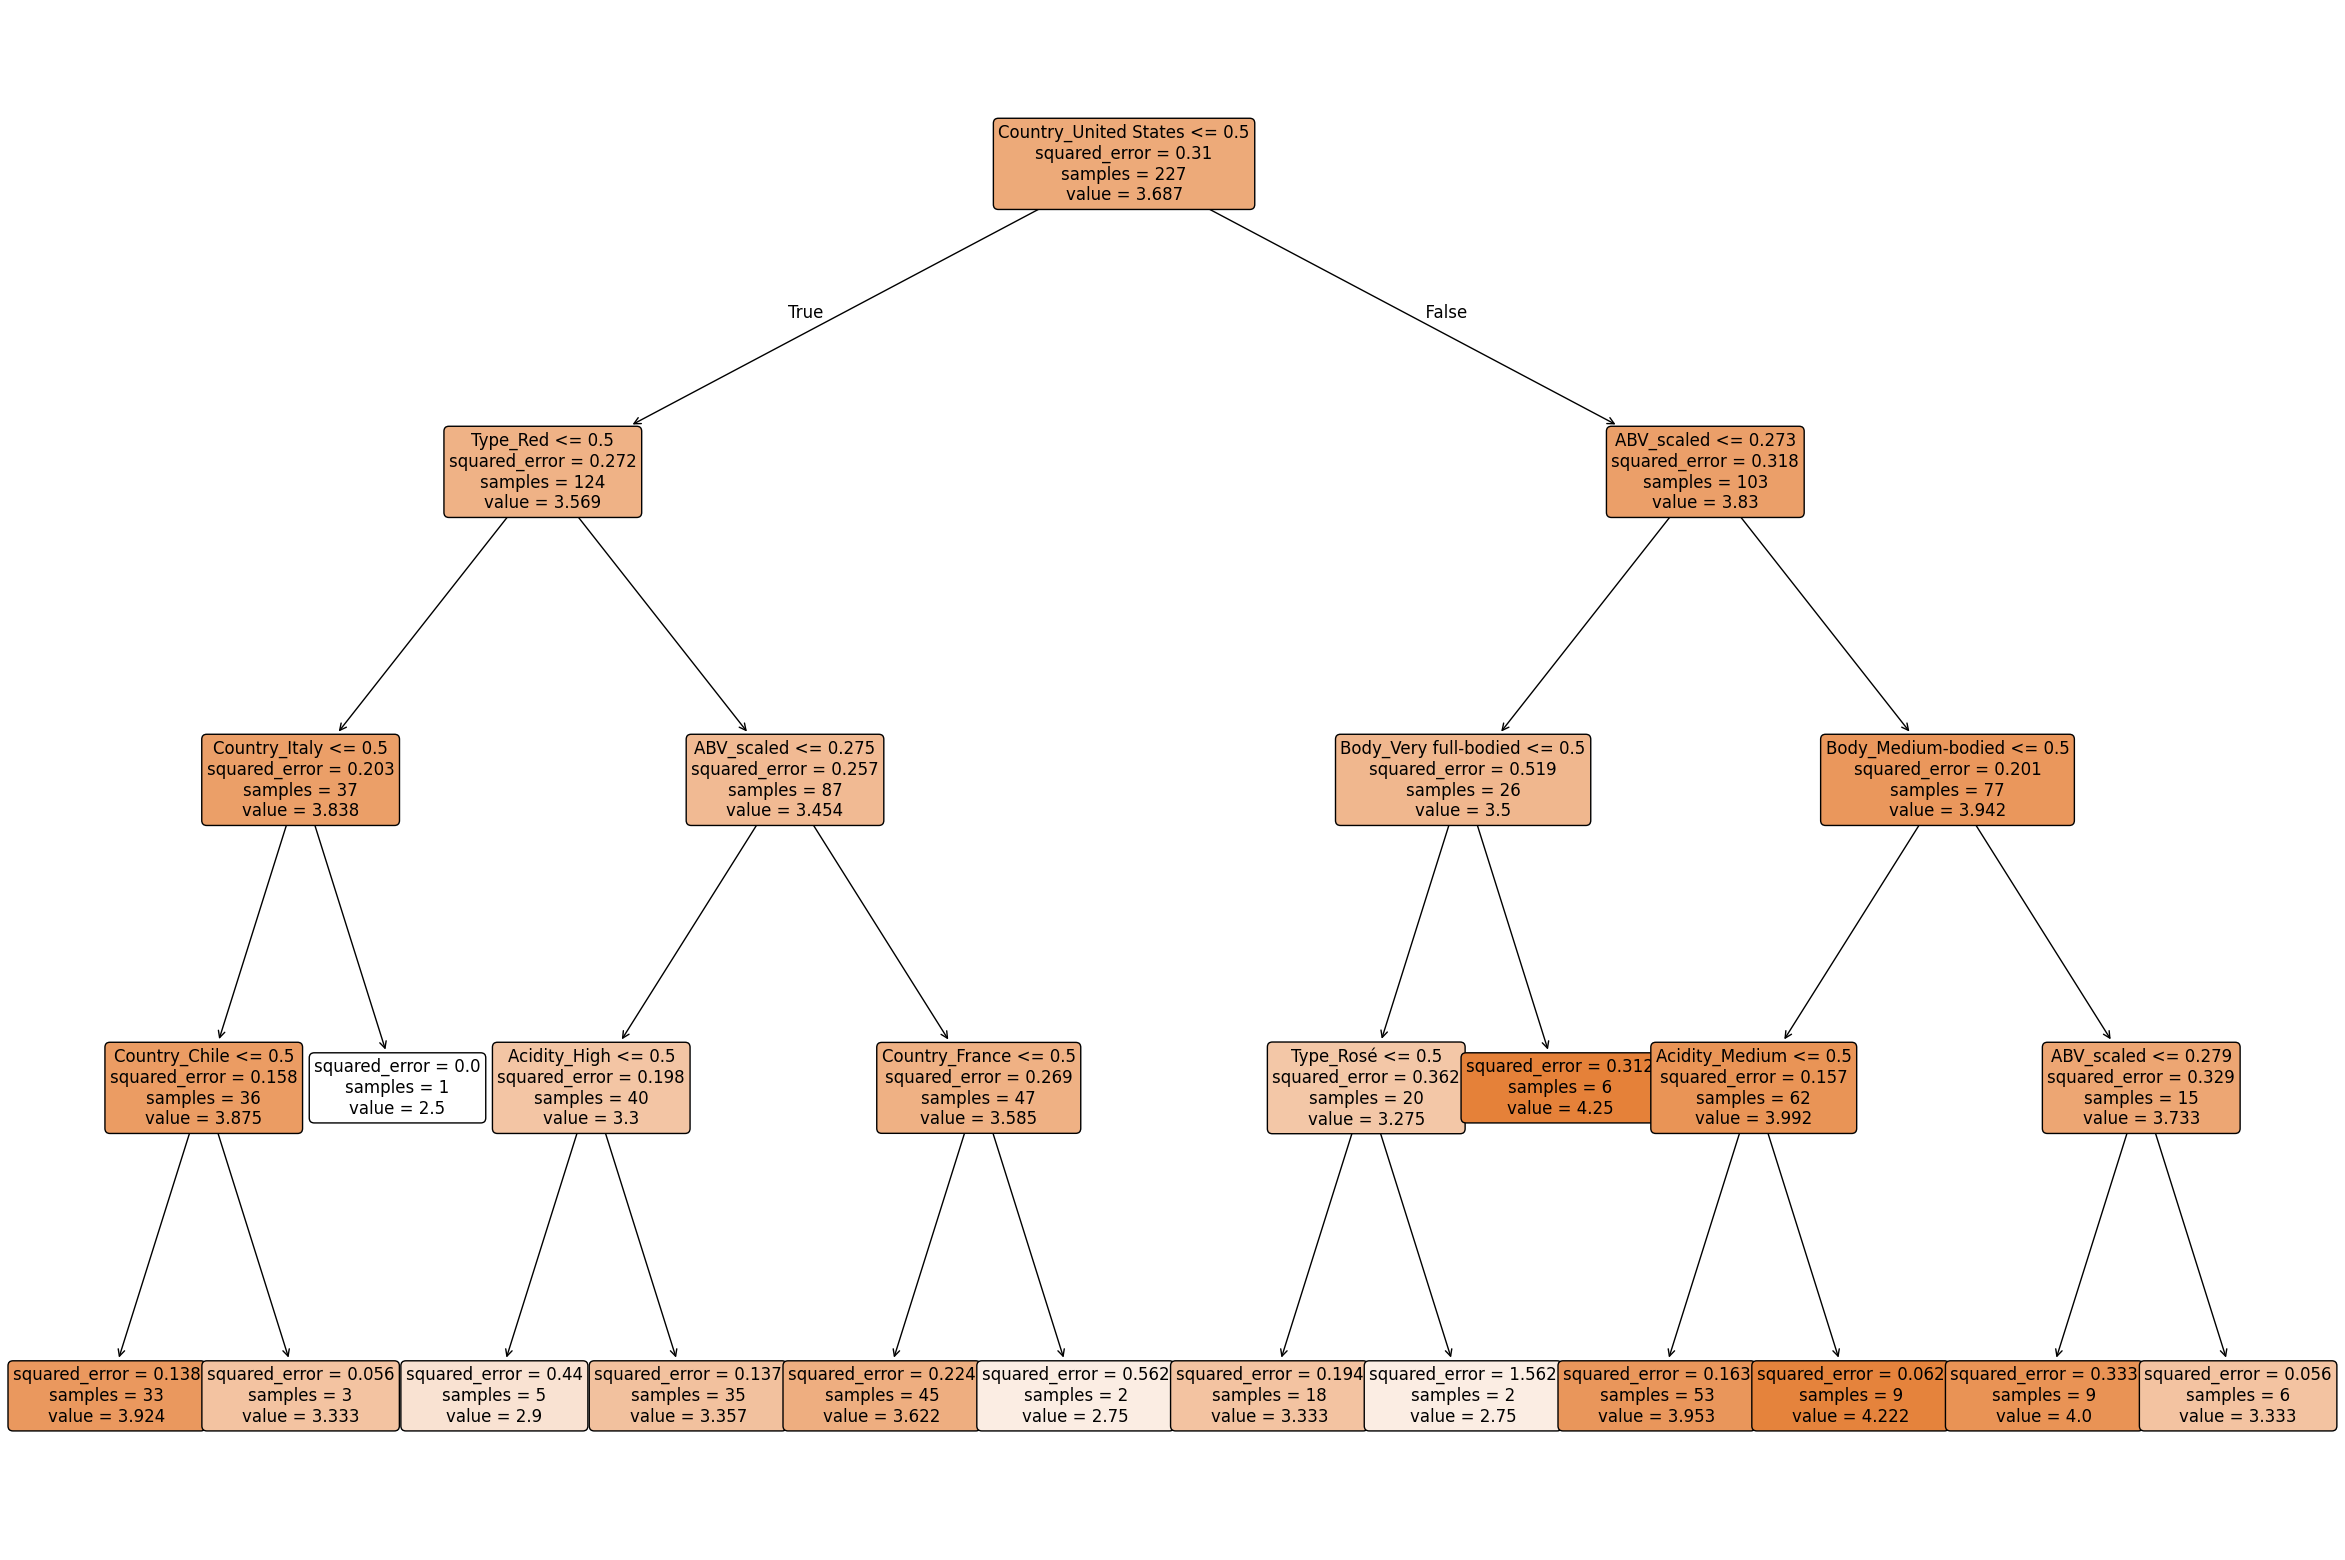

In [148]:
import matplotlib.pyplot as plt
from sklearn import tree

# Ensure that 'dt_regressor' is your trained Decision Tree Regressor
# and 'X' is your feature DataFrame used for training

# Set the figure size
plt.figure(figsize=(30, 20))

# Plot the tree
tree.plot_tree(
    dt_regressor,
    feature_names=X.columns,
    filled=True,
    rounded=True,
    fontsize=12
)

# Display the plot
plt.show()


In [149]:
# ---------------------------------------
# Step 1: Import Necessary Libraries
# ---------------------------------------
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import cross_val_score

# ---------------------------------------
# Step 2: Prepare the Data
# ---------------------------------------

# Assume that 'wines_df' and 'ratings_df' DataFrames are already loaded

# Ensure 'WineID' is set as the index in wines_df
if wines_df.index.name != 'WineID':
    wines_df.set_index('WineID', inplace=True)

# Select a user (using the previously selected 'random_user_id')
# If 'random_user_id' is not defined, select one
if 'random_user_id' not in locals():
    random_user_id = ratings_df['UserID'].sample(1).iloc[0]

# Get the user's ratings
user_ratings = ratings_df[ratings_df['UserID'] == random_user_id]

# Select the rated wines based on 'WineID'
rated_wines_df = wines_df.loc[user_ratings['WineID']]

# Reset index to ensure 'WineID' is a column
rated_wines_df = rated_wines_df.reset_index()

# Merge the user's ratings with the rated_wines_df
rated_wines_df = rated_wines_df.merge(user_ratings[['WineID', 'Rating']], on='WineID')

# Identify unrated wines
all_wine_ids = set(wines_df.index)
rated_wine_ids = set(rated_wines_df['WineID'])
unrated_wine_ids = list(all_wine_ids - rated_wine_ids)

# Get the unrated wines DataFrame
unrated_wines_df = wines_df.loc[unrated_wine_ids].reset_index()

# ---------------------------------------
# Step 3: Feature Selection and Encoding
# ---------------------------------------

# Define the features to use
selected_features = ['Type', 'Country', 'Body', 'Acidity', 'ABV']

# Separate categorical and numerical features
categorical_features = ['Type', 'Country', 'Body', 'Acidity']
numerical_features = ['ABV']

# Initialize OneHotEncoder for categorical features
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit the encoder on all wines (to capture all possible categories)
encoder.fit(wines_df[categorical_features])

# Transform categorical features for rated and unrated wines
rated_wines_encoded_cat = encoder.transform(rated_wines_df[categorical_features])
unrated_wines_encoded_cat = encoder.transform(unrated_wines_df[categorical_features])

# Get encoded feature names
encoded_feature_names = encoder.get_feature_names_out(categorical_features)

# Convert to DataFrames
rated_wines_encoded_cat = pd.DataFrame(
    rated_wines_encoded_cat,
    columns=encoded_feature_names,
    index=rated_wines_df.index
)
unrated_wines_encoded_cat = pd.DataFrame(
    unrated_wines_encoded_cat,
    columns=encoded_feature_names,
    index=unrated_wines_df.index
)

# Initialize MinMaxScaler for numerical features
scaler = MinMaxScaler()

# Fit the scaler on all wines
scaler.fit(wines_df[numerical_features])

# Scale numerical features for rated and unrated wines
rated_wines_scaled_num = scaler.transform(rated_wines_df[numerical_features])
unrated_wines_scaled_num = scaler.transform(unrated_wines_df[numerical_features])

# Convert to DataFrames
rated_wines_scaled_num = pd.DataFrame(
    rated_wines_scaled_num,
    columns=numerical_features,
    index=rated_wines_df.index
)
unrated_wines_scaled_num = pd.DataFrame(
    unrated_wines_scaled_num,
    columns=numerical_features,
    index=unrated_wines_df.index
)

# Combine encoded categorical features and scaled numerical features
rated_wines_features = pd.concat([rated_wines_encoded_cat, rated_wines_scaled_num], axis=1)
unrated_wines_features = pd.concat([unrated_wines_encoded_cat, unrated_wines_scaled_num], axis=1)

# ---------------------------------------
# Step 4: Prepare Labels for Classification
# ---------------------------------------

# Labels (convert ratings to strings for classification)
y = rated_wines_df['Rating'].astype(str)

# Features (X)
X = rated_wines_features

# Features for unrated wines
X_unrated = unrated_wines_features

# ---------------------------------------
# Step 5: Initialize and Train the Decision Tree Classifier
# ---------------------------------------

# Set max_depth to 3
dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_classifier.fit(X, y)

# ---------------------------------------
# Step 6: Predict Ratings for Unrated Wines
# ---------------------------------------

predicted_ratings = dt_classifier.predict(X_unrated)

# ---------------------------------------
# Step 7: Add Predicted Ratings to Unrated Wines DataFrame
# ---------------------------------------

unrated_wines_df['PredictedRating'] = predicted_ratings

# Convert predicted ratings to float for sorting
unrated_wines_df['PredictedRating_Value'] = unrated_wines_df['PredictedRating'].astype(float)

# ---------------------------------------
# Step 8: Recommend Wines with Higher Predicted Ratings
# ---------------------------------------

# Sort the unrated wines by predicted rating in descending order
recommended_wines = unrated_wines_df.sort_values(by='PredictedRating_Value', ascending=False)

# Define the columns to display
display_columns = ['WineName', 'Type', 'Country', 'ABV', 'Body', 'Acidity', 'PredictedRating']

# Display the top 10 recommended wines
print("\nTop 10 Recommended Wines:")
display(recommended_wines[display_columns].head(10))



Top 10 Recommended Wines:


,WineName,Type,Country,ABV,Body,Acidity,PredictedRating
81027,Bourbon Barrel Aged Zinfandel,Red,United States,16.80,Very full-bodied,High,4.5
80315,Petite Sirah,Red,United States,13.00,Very full-bodied,High,4.5
87451,Rancho Salina Vineyard Meritage,Red,United States,15.90,Full-bodied,High,4.5
83988,Cabernet Sauvignon,Red,United States,15.60,Full-bodied,High,4.5
89615,Port,Dessert/Port,United States,20.00,Very full-bodied,High,4.5
89611,Petite Sirah,Red,United States,13.50,Very full-bodied,High,4.5
89609,Signature Selection Cabernet Sauvignon,Red,United States,13.00,Very full-bodied,Medium,4.5
85818,Zinfandel,Red,United States,16.00,Very full-bodied,High,4.5
89607,Carl's Reserve Zinfandel,Red,United States,12.50,Very full-bodied,High,4.5
91398,Coast View Vineyard Syrah Port,Dessert/Port,United States,18.50,Very full-bodied,High,4.5


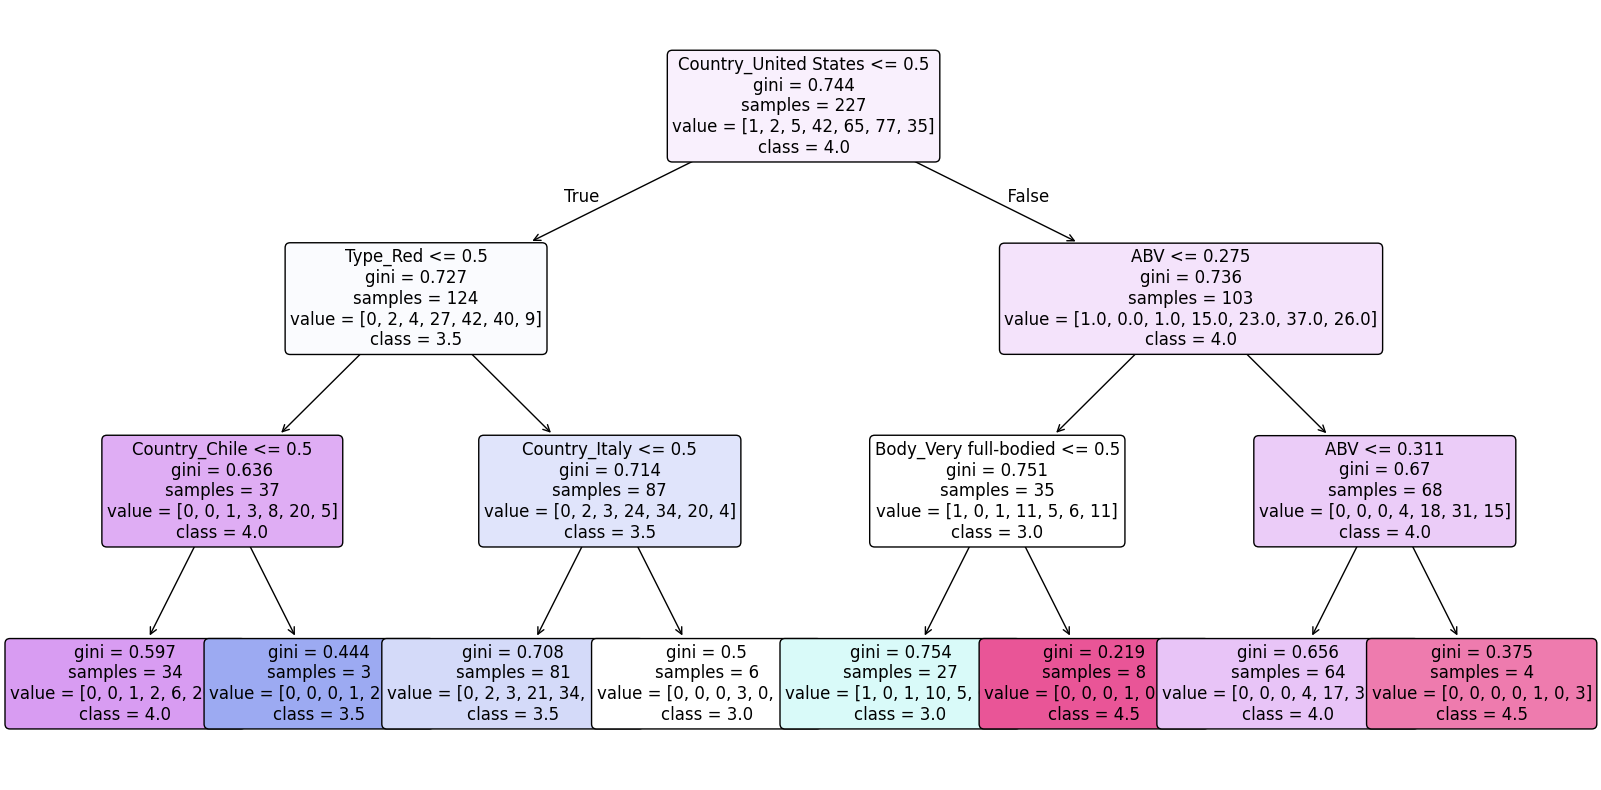

In [150]:
# Set the figure size for better readability
plt.figure(figsize=(20, 10))

# Plot the decision tree
tree.plot_tree(
    dt_classifier,
    feature_names=X.columns,          # Feature names used in training
    class_names=dt_classifier.classes_,  # Class names (unique ratings)
    filled=True,                      # Fill nodes with colors
    rounded=True,                     # Rounded nodes
    fontsize=12                       # Font size for text in the tree
)

# Display the plot
plt.show()

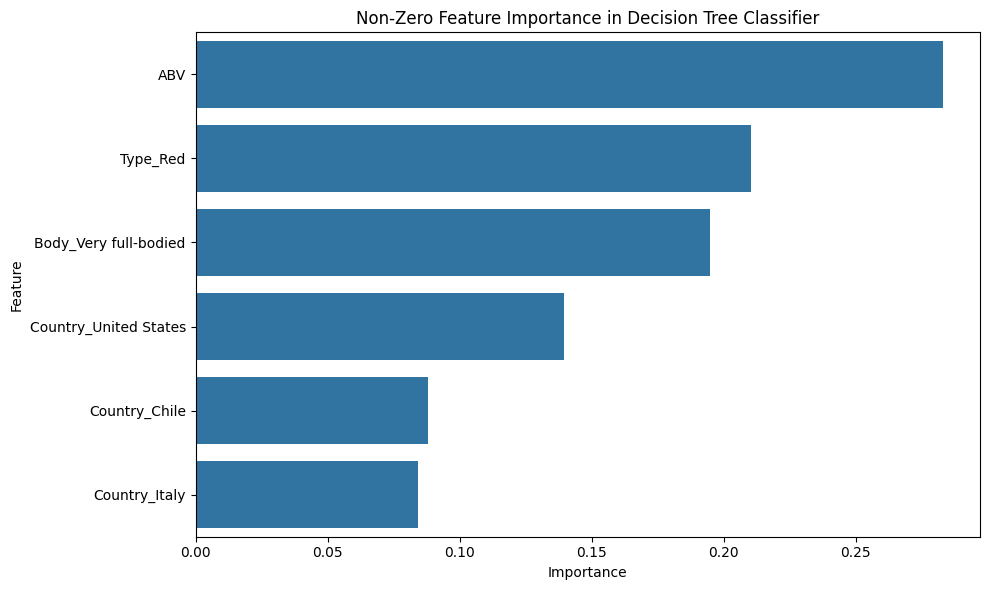

In [152]:
# ---------------------------------------
# Step 10: Plot Non-Zero Feature Importance
# ---------------------------------------

# Get the feature importances
feature_importances = dt_classifier.feature_importances_

# Create a DataFrame to hold feature names and their corresponding importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Filter out the features with zero importance
importance_df = importance_df[importance_df['Importance'] > 0]

# Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Non-Zero Feature Importance in Decision Tree Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


### Evaluating using Decision Tree Classifier

In [155]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from tqdm import tqdm  # For progress bars
import multiprocessing as mp


In [156]:
# Assuming 'wines_df' and 'ratings_df' are already loaded as pandas DataFrames

# Ensure 'WineID' is set as the index in wines_df
if wines_df.index.name != 'WineID':
    wines_df.set_index('WineID', inplace=True)

# Define categorical and numerical features
categorical_features = ['Type', 'Country', 'Body', 'Acidity']
numerical_features = ['ABV']

# Initialize OneHotEncoder for categorical features
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder.fit(wines_df[categorical_features])

# Initialize MinMaxScaler for numerical features
scaler = MinMaxScaler()
scaler.fit(wines_df[numerical_features])


MinMaxScaler()

In [157]:
def evaluate_user(user_id):
    """
    Evaluates a single user by training a Decision Tree Classifier and computing evaluation metrics.
    
    Parameters:
    - user_id: The unique identifier for the user.
    
    Returns:
    - A dictionary containing the evaluation metrics for the user.
    """
    # Filter ratings for the current user
    user_ratings = ratings_df[ratings_df['UserID'] == user_id]
    
    # Proceed only if the user has rated at least 5 wines to allow for train-test split
    if len(user_ratings) < 5:
        return None  # Not enough data to evaluate
    
    # Select the rated wines based on 'WineID'
    try:
        rated_wines = wines_df.loc[user_ratings['WineID']]
    except KeyError:
        # Handle cases where WineID might not be present in wines_df
        return None
    
    # Reset index to ensure 'WineID' is a column
    rated_wines = rated_wines.reset_index()
    
    # Merge the user's ratings with the rated_wines DataFrame
    rated_wines = rated_wines.merge(user_ratings[['WineID', 'Rating']], on='WineID')
    
    # Encode categorical features
    encoded_cat = encoder.transform(rated_wines[categorical_features])
    encoded_cat_df = pd.DataFrame(encoded_cat, columns=encoder.get_feature_names_out(categorical_features))
    
    # Scale numerical features
    scaled_num = scaler.transform(rated_wines[numerical_features])
    scaled_num_df = pd.DataFrame(scaled_num, columns=numerical_features)
    
    # Combine encoded categorical features and scaled numerical features
    features = pd.concat([encoded_cat_df, scaled_num_df], axis=1)
    
    # Prepare labels (convert ratings to strings for classification)
    y = rated_wines['Rating'].astype(str)
    
    # Features (X)
    X = features
    
    # Train-test split (80-20)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    # Initialize and train the Decision Tree Classifier with max_depth=3
    clf = DecisionTreeClassifier(max_depth=3, random_state=42)
    clf.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = clf.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    
    # Return the metrics
    return {
        'UserID': user_id,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }


In [ ]:
# Get the list of unique users
unique_users = ratings_df['UserID'].unique()

# Initialize a list to store results
results = []

# Define the number of processes (you can adjust this based on your CPU cores)
num_processes = mp.cpu_count()

# Function to filter out None results
def filter_none(x):
    return x is not None

# Use multiprocessing Pool for parallel processing
with mp.Pool(processes=num_processes) as pool:
    # Use imap_unordered for efficient memory usage
    for res in tqdm(pool.imap_unordered(evaluate_user, unique_users), total=len(unique_users)):
        if res is not None:
            results.append(res)

# Convert results to a DataFrame
metrics_df = pd.DataFrame(results)


## Collaborative Filtering Recommender System